In [1]:
import pandas as pd

In [2]:
columns = [
    'class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
    'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
    'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'
]

In [3]:
df = pd.read_csv("wine.data", header=None, names=columns)

In [4]:
print(df.head())

   class  alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   color_intensity   hue  od280/od315_of_diluted_wines  proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

In [5]:
# so data has read, lets see if there is null data
print(df.isnull().sum())

class                           0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


In [6]:
# there is no null data

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# imported visualization tools

In [9]:

features = df.columns[1:] 
classes = df['class'].unique()


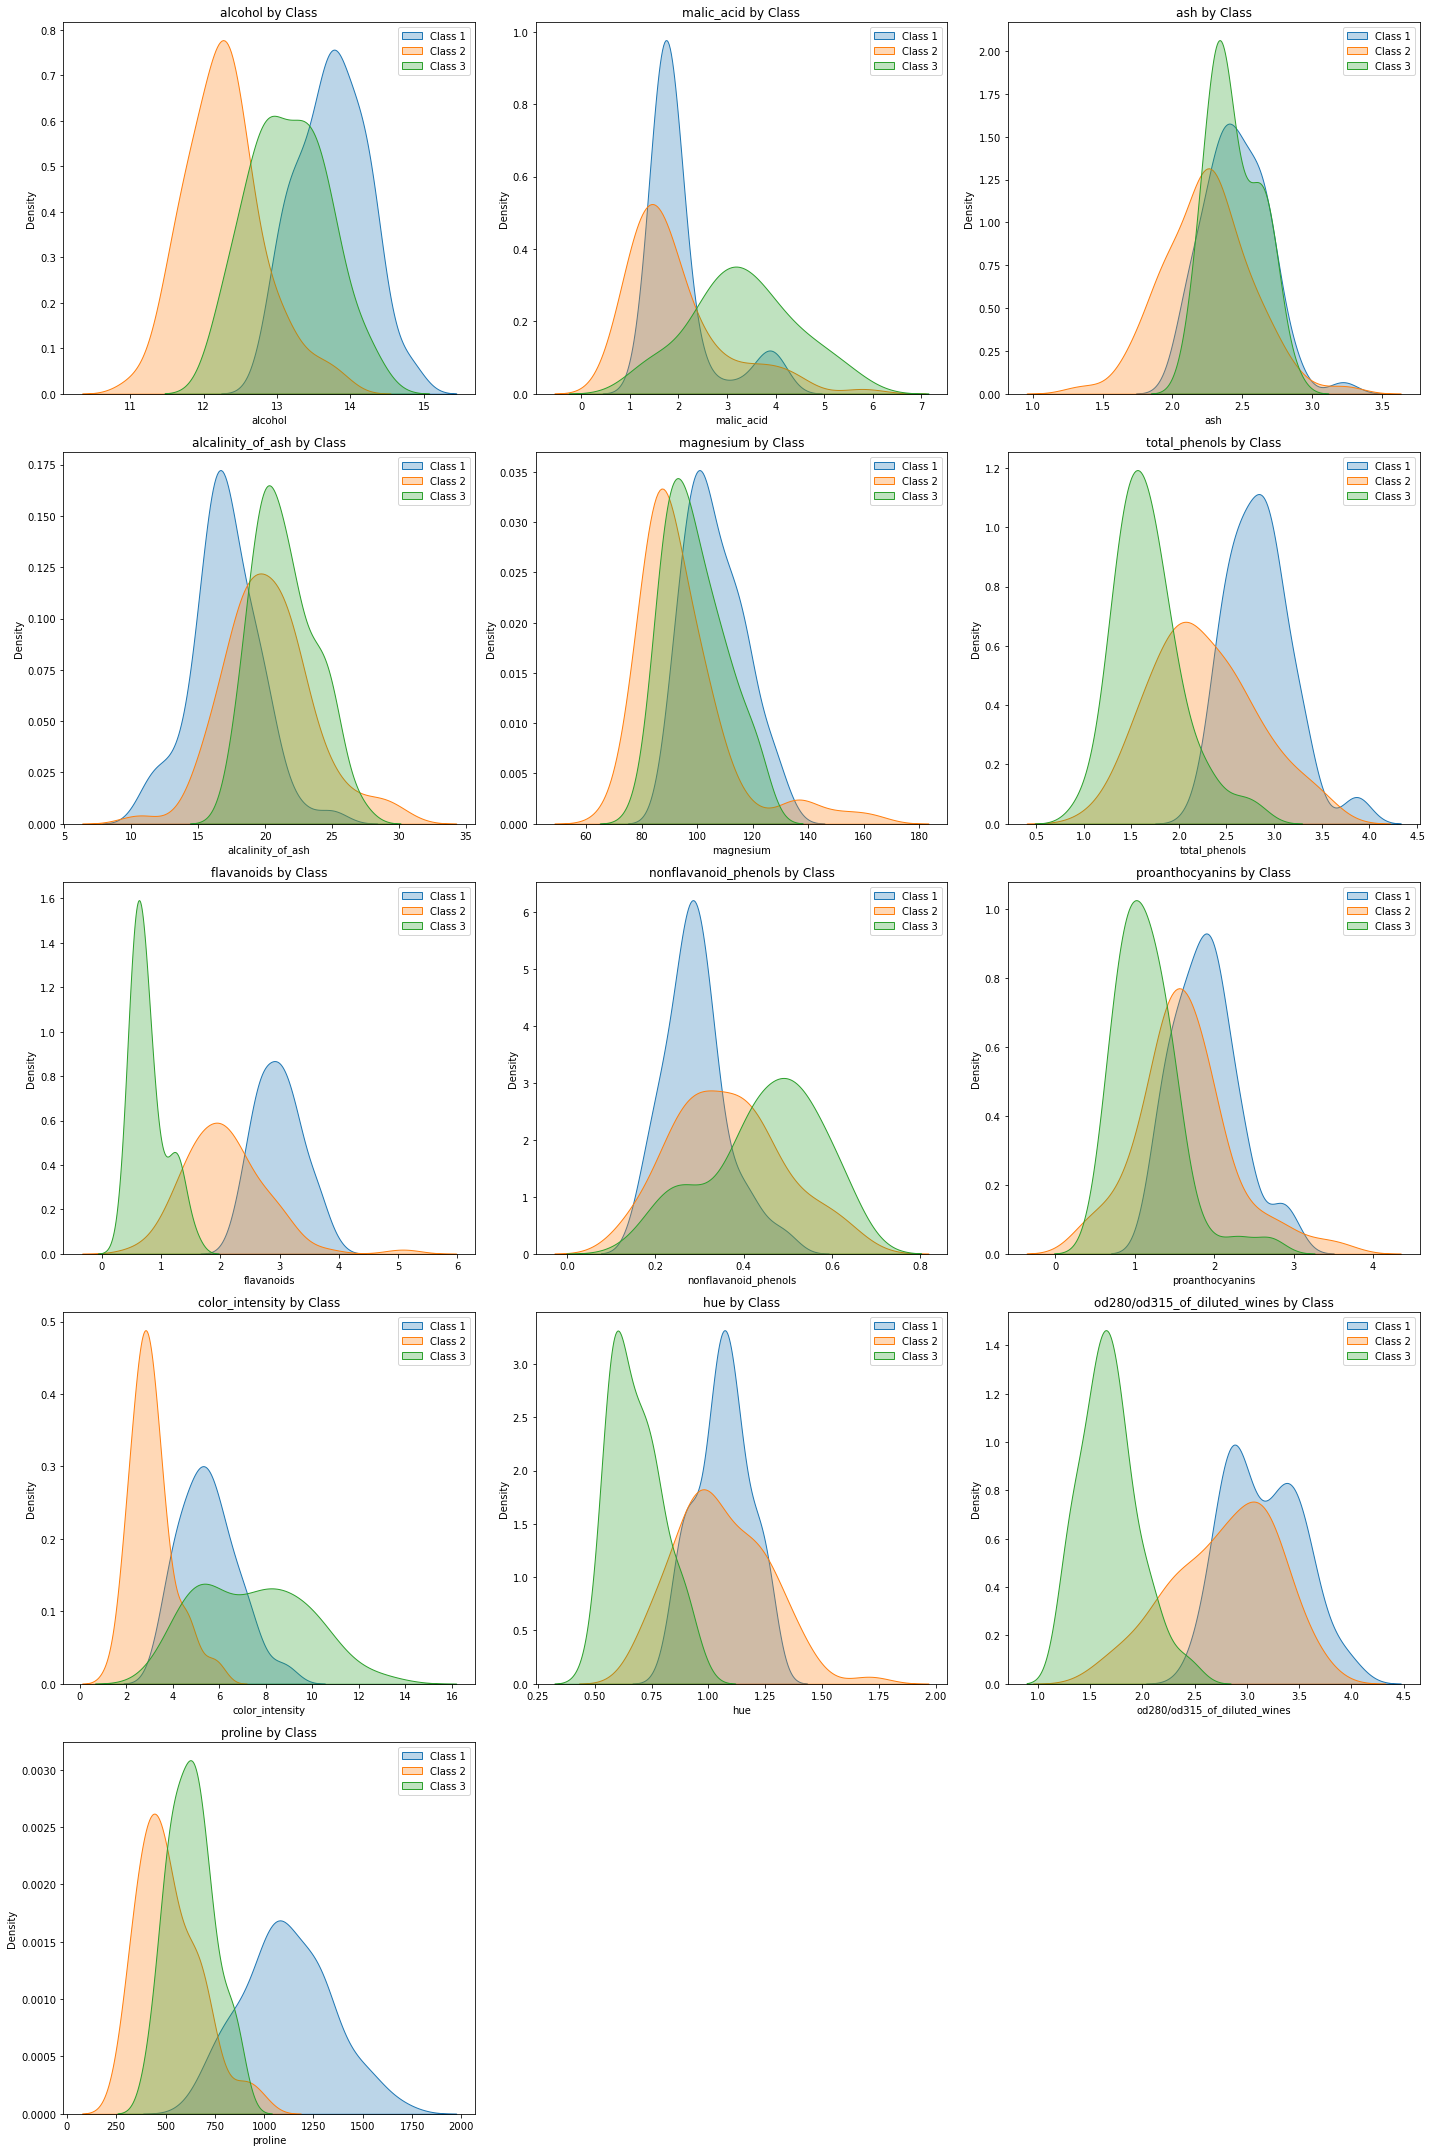

In [10]:
plt.figure(figsize=(20, 30))

for i, feature in enumerate(features):
    plt.subplot(5, 3, i + 1)
    for cls in classes:
        subset = df[df['class'] == cls]
        sns.kdeplot(subset[feature], label=f"Class {cls}", fill=True, alpha=0.3)
    plt.title(f"{feature} by Class")
    plt.legend()

plt.tight_layout()
plt.show()

# Feature distribution plots for the Wine dataset (13 features total).
# Each KDE plot compares the distribution of a feature across the three wine classes.

# Observations:
# - Features like 'flavanoids', 'color_intensity', 'proline', 'od280/od315_of_diluted_wines', and 'alcohol'
#   show clear separation between classes. These features are likely to be highly informative for classification.

# - Features such as 'malic_acid', 'magnesium', and 'hue' exhibit some degree of class overlap,
#   but still show potential in contributing to class distinction.

# - Features like 'ash', 'alcalinity_of_ash', 'nonflavanoid_phenols', and 'proanthocyanins'
#   show significant overlap between classes and may not be as useful individually for classification.

# Conclusion:
# The dataset includes several strongly discriminative features, which suggests that
# distance-based classifiers like k-NN can perform well when appropriate normalization is applied.

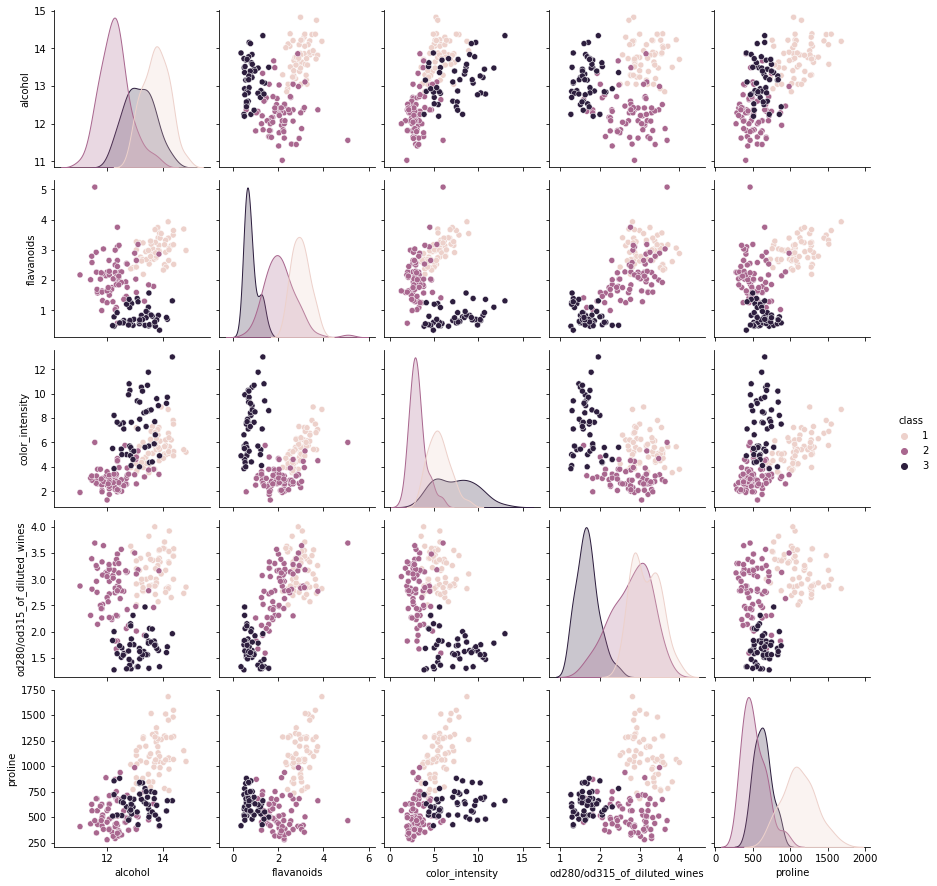

In [11]:
sns.pairplot(df, hue='class', vars=[
    'alcohol', 'flavanoids', 'color_intensity', 'od280/od315_of_diluted_wines', 'proline'
])
plt.show()

# Pairplot of selected features from the Wine dataset with class labels as hue.
# This scatter matrix shows the pairwise relationships between features for each wine class.

# - There is a strong separation between classes in several feature pairs.
#   For example, combinations like:
#     - 'flavanoids' vs 'color_intensity',
#     - 'alcohol' vs 'proline',
#     - 'od280/od315_of_diluted_wines' vs others
#   show distinct clusters for each class.

# - Class 1 (dark purple) tends to have higher values in many feature pairs,
#   especially for 'flavanoids', 'alcohol', and 'proline'.

# - Class 2 (light pink) and Class 3 (light purple) show some overlap in certain feature spaces,
#   but still maintain distinguishable patterns.

# - The diagonal plots show KDE distributions for each feature per class,
#   consistent with our earlier univariate analysis.

# The selected features provide good separation between wine classes in 2D space.
# This supports the idea that a distance-based classifier like k-NN can effectively classify the samples
# when the data is properly scaled.


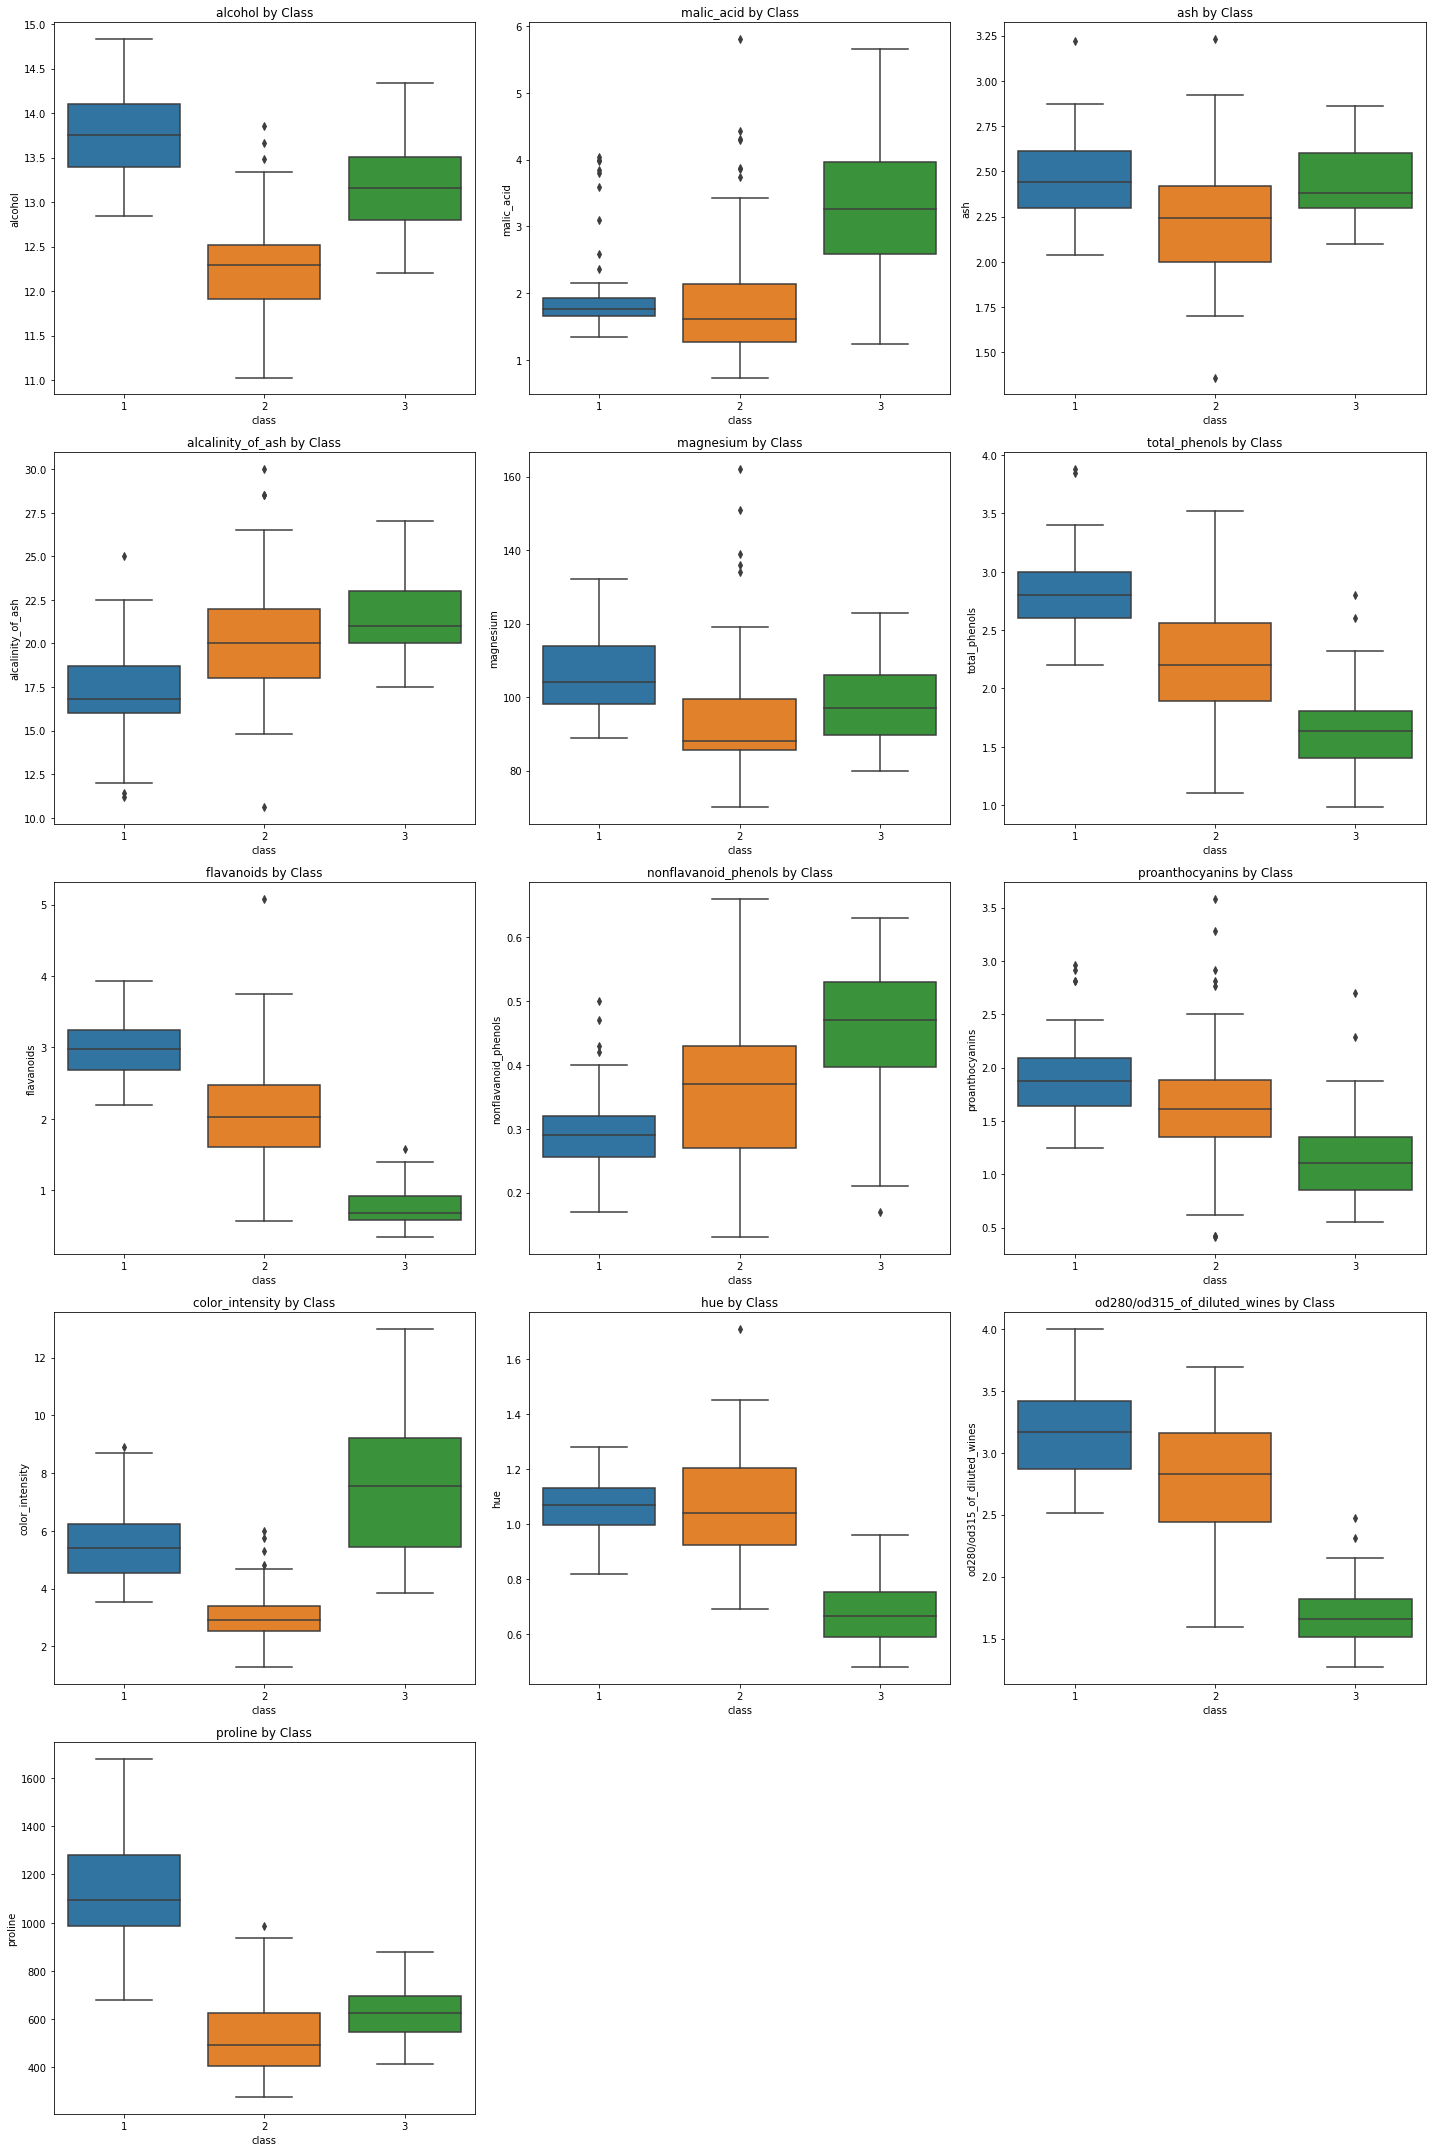

In [12]:
plt.figure(figsize=(20, 30))

for i, feature in enumerate(features):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(x='class', y=feature, data=df)
    plt.title(f"{feature} by Class")

plt.tight_layout()
plt.show()

# Boxplots of each feature grouped by wine class.
# This visualization helps identify class-wise distribution, median, and outliers for each feature.

# - Features such as 'flavanoids', 'proline', 'od280/od315_of_diluted_wines', and 'alcohol'
#   show strong class separation, especially in median and interquartile range (IQR).
#   These features are promising for classification.

# - Several features contain visible outliers (e.g., 'malic_acid', 'color_intensity', 'hue'),
#   particularly for class 2 and class 3. This should be considered during normalization.

# - Some features like 'ash', 'alcalinity_of_ash', and 'nonflavanoid_phenols' display overlapping IQRs
#   across classes, indicating limited discriminative power.

# - Class 1 (blue) often shows higher medians for key features (e.g., 'alcohol', 'flavanoids'),
#   suggesting more distinctive values compared to Class 2 and 3.

# Boxplots confirm the findings from histograms and pairplots.
# Certain features are clearly more informative for class separation,
# and the presence of outliers may impact distance-based algorithms like k-NN if not properly scaled.


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
X = df.drop('class', axis=1)
y = df['class']


In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# - test_size=0.2 → 20% of the data is reserved for testing, 80% for training
# - random_state=42 → ensures reproducibility (you get the same split every time)
# - stratify=y → preserves the original class distribution in both training and test sets

In [17]:
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 142
Testing set size: 36


In [18]:
# our split works well

In [19]:
import numpy as np
from collections import Counter

In [36]:
def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan(a, b):
    return np.sum(np.abs(a - b))


In [37]:
def knn_predict(X_train, y_train, X_test, k=3, distance_metric='euclidean'):
    predictions = []
    
    for x in X_test:
        if distance_metric == 'euclidean':
            distances = [euclidean(x, x_train) for x_train in X_train]
        elif distance_metric == 'manhattan':
            distances = [manhattan(x, x_train) for x_train in X_train]
        else:
            raise ValueError("Unknown distance metric")

        k_indices = np.argsort(distances)[:k]

        k_nearest_labels = [y_train[i] for i in k_indices]

        most_common = Counter(k_nearest_labels).most_common(1)[0][0]
        predictions.append(most_common)
    
    return predictions

In [38]:
# Compute the Euclidean distance between two vectors
# Compute the Manhattan distance between two vectors
# Custom k-NN algorithm implementation
# List to store the predictions for each test sample
# Loop over each test instance
# Compute distances from the test sample to all training samples (Euclidean or Manhattan)
# Sort distances and get the indices of the k nearest neighbors
# Get the labels of the k nearest neighbors
# Determine the most common class label among the neighbors
# Append the predicted label to the predictions list
# Return all predicted labels

In [46]:
from sklearn.metrics import accuracy_score

k_values = list(range(1, 31))  # [1, 3, 5, ..., 21]

accuracies_euclidean = []
accuracies_manhattan = []

for k in k_values:
    # using Euclidean distance
    y_pred_euc = knn_predict(X_train, y_train.tolist(), X_test, k=k, distance_metric='euclidean')
    acc_euc = accuracy_score(y_test, y_pred_euc)
    accuracies_euclidean.append(acc_euc)
    
    # using Manhattan distance
    y_pred_man = knn_predict(X_train, y_train.tolist(), X_test, k=k, distance_metric='manhattan')
    acc_man = accuracy_score(y_test, y_pred_man)
    accuracies_manhattan.append(acc_man)


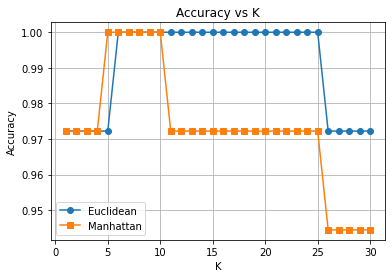

In [47]:
plt.plot(k_values, accuracies_euclidean, marker='o', label='Euclidean')
plt.plot(k_values, accuracies_manhattan, marker='s', label='Manhattan')
plt.title('Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrices(k_values, X_train, y_train, X_test, y_test):
    for distance in ['euclidean', 'manhattan']:
        for k in k_values:
            y_pred = knn_predict(X_train, y_train.tolist(), X_test, k=k, distance_metric=distance)

            cm = confusion_matrix(y_test, y_pred)

            plt.figure(figsize=(5,4))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
            plt.title(f'Confusion Matrix (k={k}, {distance.capitalize()})')
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')
            plt.tight_layout()
            plt.show()

            print(f"Classification Report (k={k}, {distance.capitalize()}):")
            print(classification_report(y_test, y_pred))

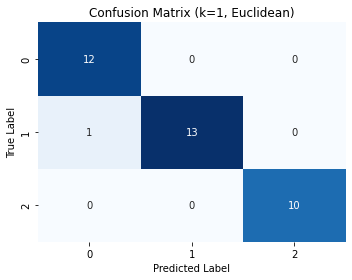

Classification Report (k=1, Euclidean):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



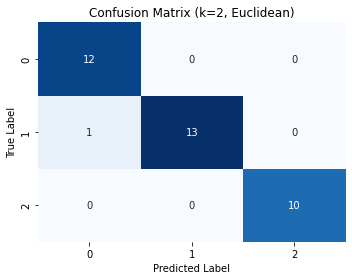

Classification Report (k=2, Euclidean):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



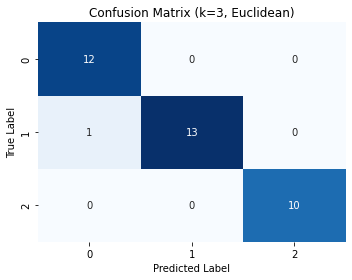

Classification Report (k=3, Euclidean):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



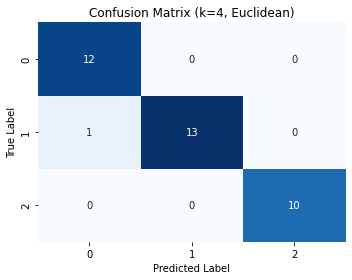

Classification Report (k=4, Euclidean):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



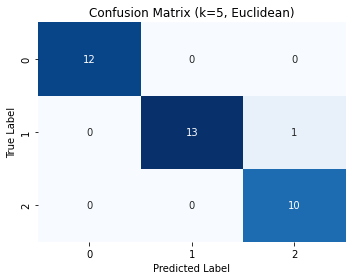

Classification Report (k=5, Euclidean):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      0.93      0.96        14
           3       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



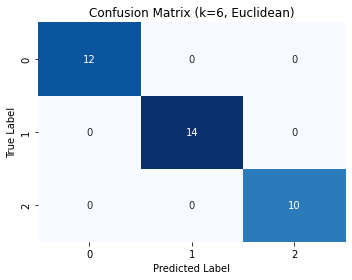

Classification Report (k=6, Euclidean):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



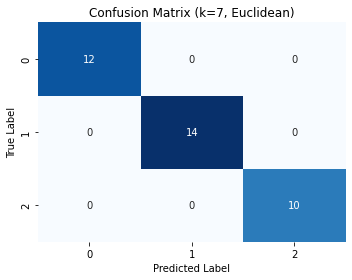

Classification Report (k=7, Euclidean):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



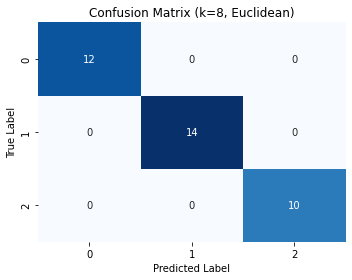

Classification Report (k=8, Euclidean):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



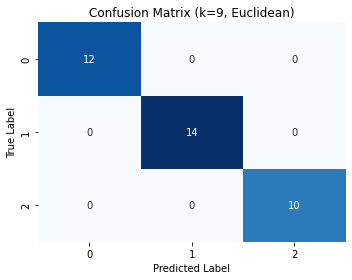

Classification Report (k=9, Euclidean):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



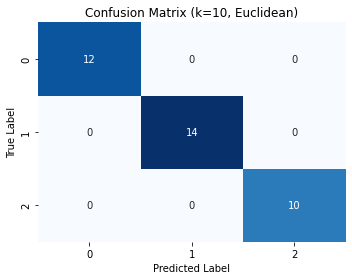

Classification Report (k=10, Euclidean):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



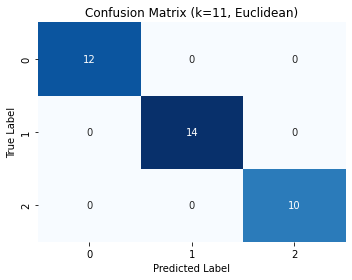

Classification Report (k=11, Euclidean):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



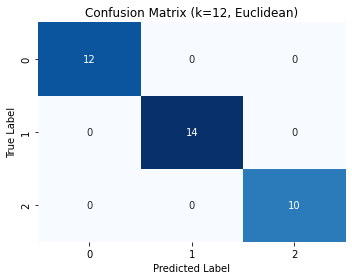

Classification Report (k=12, Euclidean):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



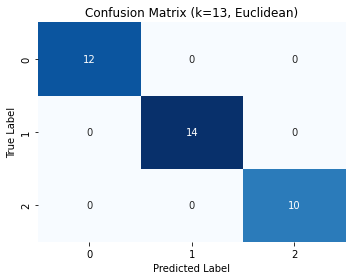

Classification Report (k=13, Euclidean):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



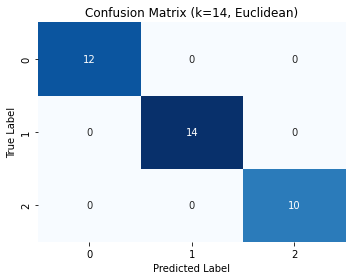

Classification Report (k=14, Euclidean):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



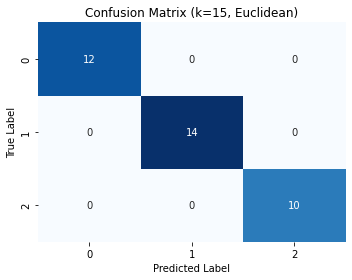

Classification Report (k=15, Euclidean):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



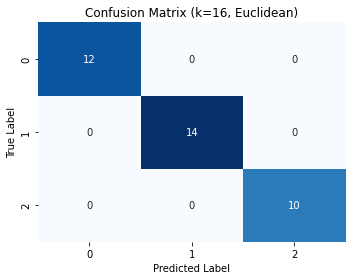

Classification Report (k=16, Euclidean):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



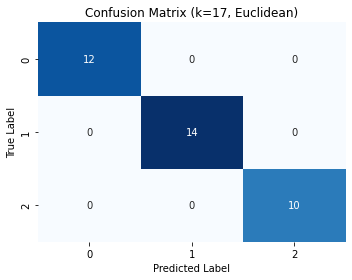

Classification Report (k=17, Euclidean):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



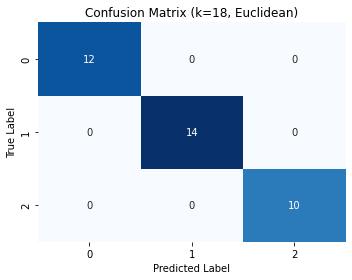

Classification Report (k=18, Euclidean):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



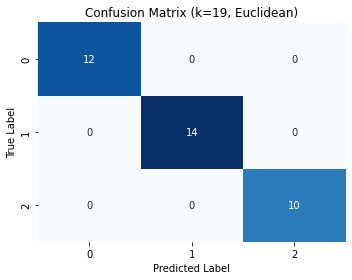

Classification Report (k=19, Euclidean):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



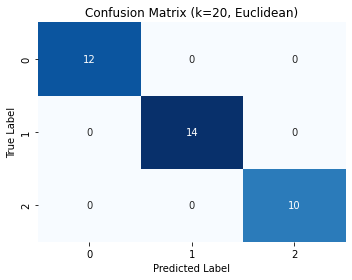

Classification Report (k=20, Euclidean):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



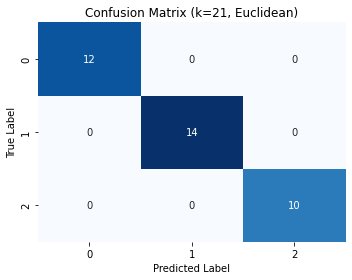

Classification Report (k=21, Euclidean):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



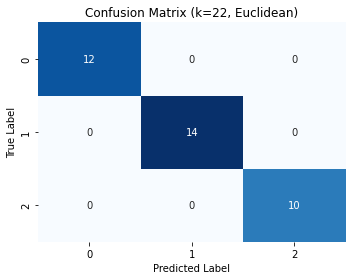

Classification Report (k=22, Euclidean):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



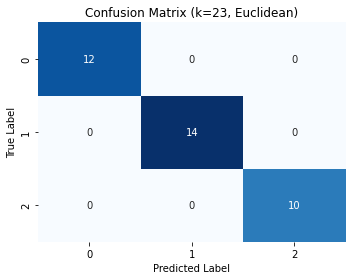

Classification Report (k=23, Euclidean):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



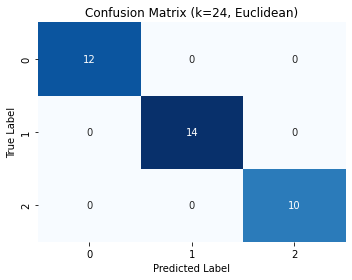

Classification Report (k=24, Euclidean):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



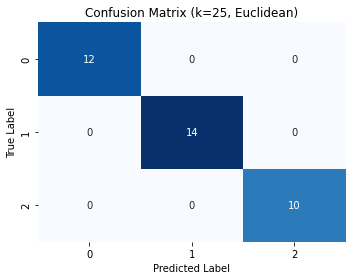

Classification Report (k=25, Euclidean):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



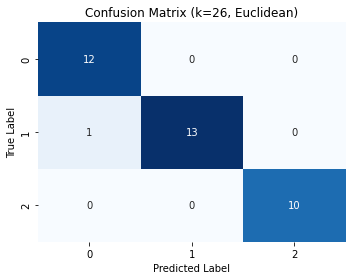

Classification Report (k=26, Euclidean):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



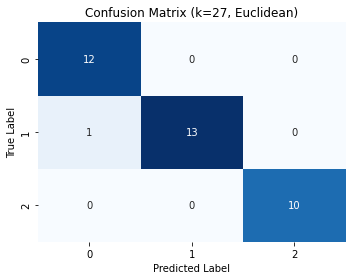

Classification Report (k=27, Euclidean):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



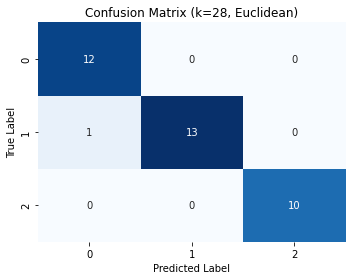

Classification Report (k=28, Euclidean):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



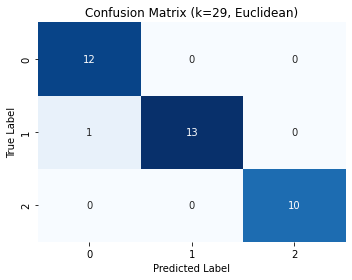

Classification Report (k=29, Euclidean):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



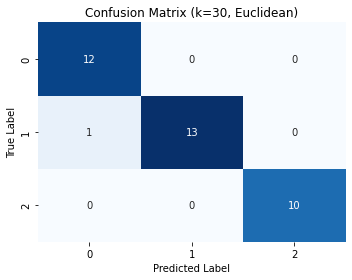

Classification Report (k=30, Euclidean):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



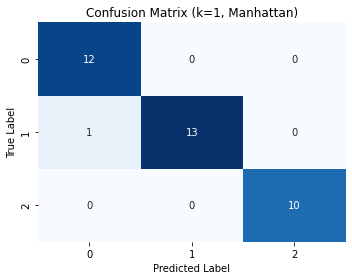

Classification Report (k=1, Manhattan):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



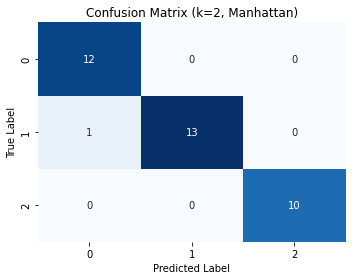

Classification Report (k=2, Manhattan):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



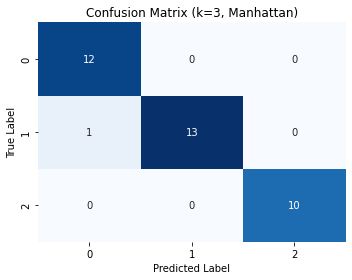

Classification Report (k=3, Manhattan):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



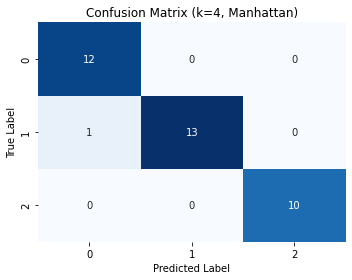

Classification Report (k=4, Manhattan):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



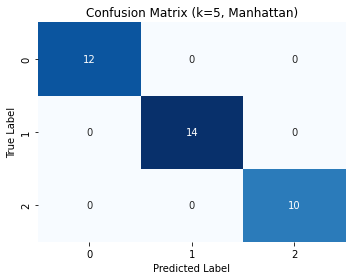

Classification Report (k=5, Manhattan):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



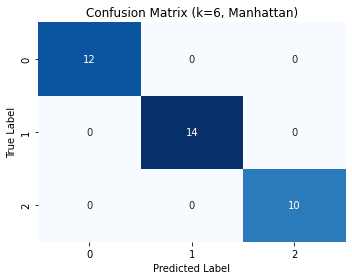

Classification Report (k=6, Manhattan):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



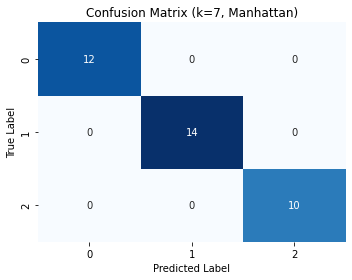

Classification Report (k=7, Manhattan):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



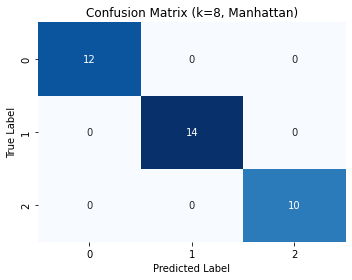

Classification Report (k=8, Manhattan):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



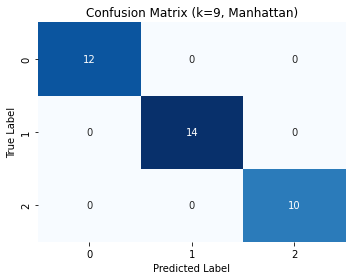

Classification Report (k=9, Manhattan):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



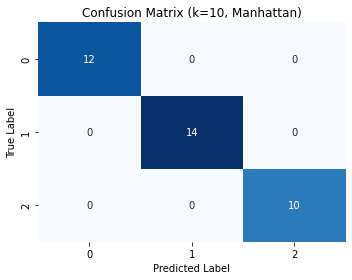

Classification Report (k=10, Manhattan):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



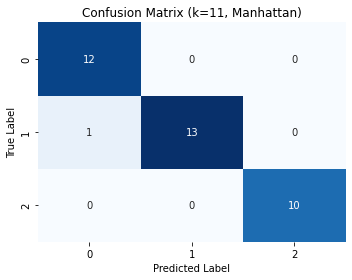

Classification Report (k=11, Manhattan):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



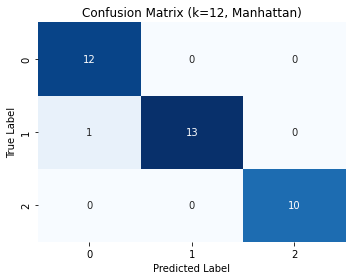

Classification Report (k=12, Manhattan):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



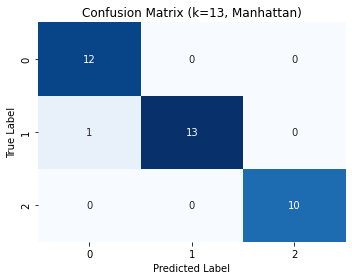

Classification Report (k=13, Manhattan):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



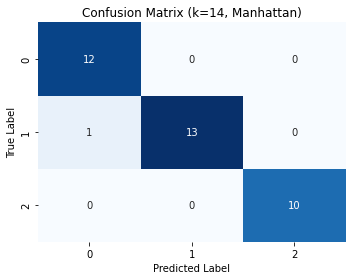

Classification Report (k=14, Manhattan):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



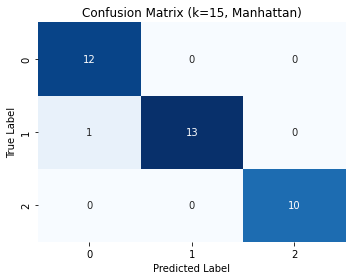

Classification Report (k=15, Manhattan):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



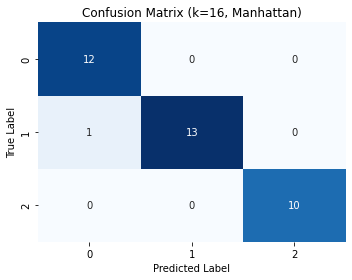

Classification Report (k=16, Manhattan):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



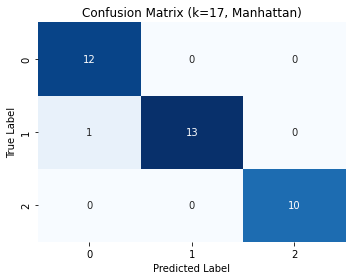

Classification Report (k=17, Manhattan):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



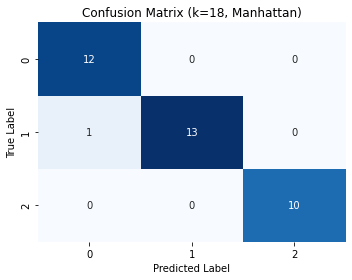

Classification Report (k=18, Manhattan):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



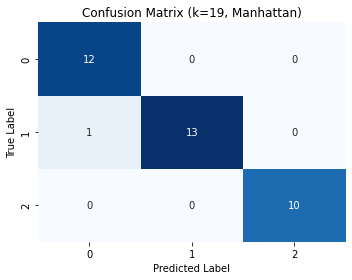

Classification Report (k=19, Manhattan):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



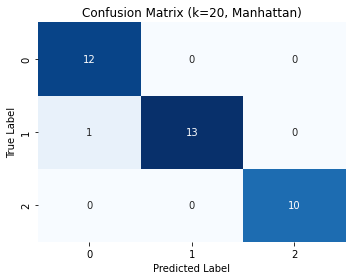

Classification Report (k=20, Manhattan):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



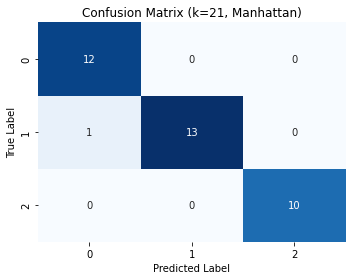

Classification Report (k=21, Manhattan):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



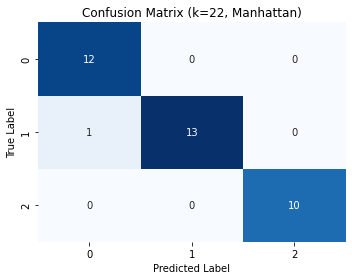

Classification Report (k=22, Manhattan):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



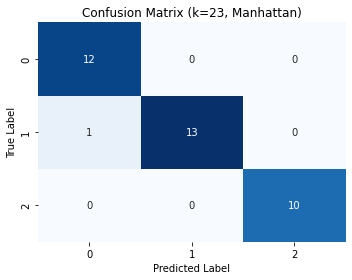

Classification Report (k=23, Manhattan):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



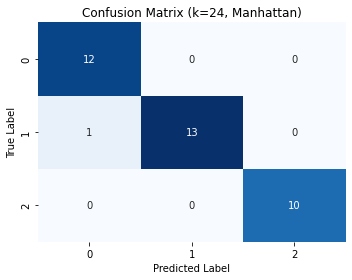

Classification Report (k=24, Manhattan):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



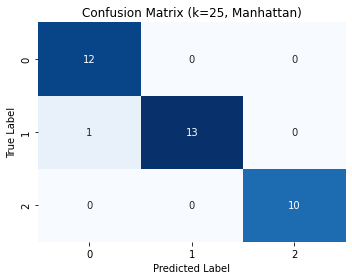

Classification Report (k=25, Manhattan):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



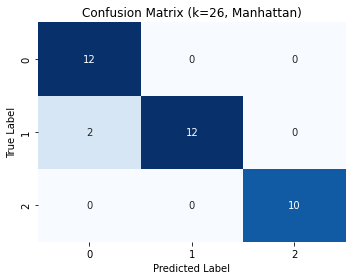

Classification Report (k=26, Manhattan):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.86      0.92        14
           3       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



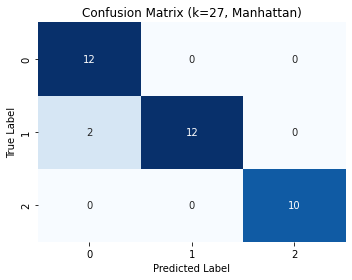

Classification Report (k=27, Manhattan):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.86      0.92        14
           3       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



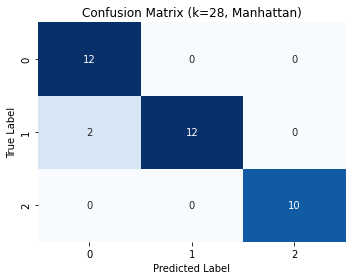

Classification Report (k=28, Manhattan):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.86      0.92        14
           3       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



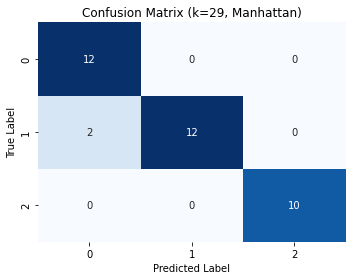

Classification Report (k=29, Manhattan):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.86      0.92        14
           3       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



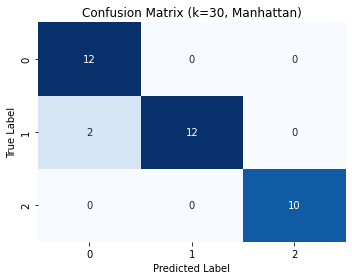

Classification Report (k=30, Manhattan):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.86      0.92        14
           3       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



In [50]:
plot_confusion_matrices(k_values, X_train, y_train, X_test, y_test)

In [52]:
# Now I'll do an implementation uses sklearn's built-in KNeighborsClassifier to verify the correctness
# and performance of the custom k-NN algorithm implemented from scratch.
# By comparing accuracy, confusion matrix, and classification reports between both versions,
# we can evaluate how closely the custom k-NN matches a well-tested library implementation.


In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# K values to test
k_values = list(range(1, 31))  # 1 to 30 inclusive

# Accuracy lists
accuracies_euclidean = []
accuracies_manhattan = []

# Loop over each K
for k in k_values:
    # Euclidean distance (default = 'minkowski', p=2)
    knn_euc = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    knn_euc.fit(X_train, y_train)
    y_pred_euc = knn_euc.predict(X_test)
    acc_euc = accuracy_score(y_test, y_pred_euc)
    accuracies_euclidean.append(acc_euc)

    # Manhattan distance (p=1)
    knn_man = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    knn_man.fit(X_train, y_train)
    y_pred_man = knn_man.predict(X_test)
    acc_man = accuracy_score(y_test, y_pred_man)
    accuracies_manhattan.append(acc_man)

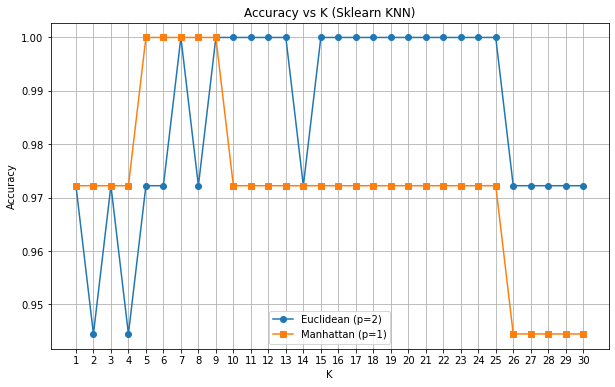

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies_euclidean, marker='o', label='Euclidean (p=2)')
plt.plot(k_values, accuracies_manhattan, marker='s', label='Manhattan (p=1)')
plt.title('Accuracy vs K (Sklearn KNN)')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

In [61]:
k_values = list(range(1, 31))
comparison_results = []

for k in k_values:
    # --- Sklearn KNN ---
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    y_pred_sklearn = clf.predict(X_test)

    # --- Custom KNN ---
    y_pred_custom = knn_predict(X_train, y_train.tolist(), X_test, k=k, distance_metric='euclidean')

    # --- Accuracy Scores ---
    acc_sklearn = accuracy_score(y_test, y_pred_sklearn)
    acc_custom = accuracy_score(y_test, y_pred_custom)

    # --- Prediction Match Rate ---
    match_count = np.sum(np.array(y_pred_custom) == np.array(y_pred_sklearn))
    total = len(y_test)
    match_rate = match_count / total

    comparison_results.append({
        'k': k,
        'acc_sklearn': acc_sklearn,
        'acc_custom': acc_custom,
        'match_rate': match_rate,
        'different_predictions': total - match_count
    })

comparison_df = pd.DataFrame(comparison_results)
print(comparison_df)

     k  acc_sklearn  acc_custom  match_rate  different_predictions
0    1     0.972222    0.972222    1.000000                      0
1    2     0.944444    0.972222    0.972222                      1
2    3     0.972222    0.972222    1.000000                      0
3    4     0.944444    0.972222    0.972222                      1
4    5     0.972222    0.972222    1.000000                      0
5    6     0.972222    1.000000    0.972222                      1
6    7     1.000000    1.000000    1.000000                      0
7    8     0.972222    1.000000    0.972222                      1
8    9     1.000000    1.000000    1.000000                      0
9   10     1.000000    1.000000    1.000000                      0
10  11     1.000000    1.000000    1.000000                      0
11  12     1.000000    1.000000    1.000000                      0
12  13     1.000000    1.000000    1.000000                      0
13  14     0.972222    1.000000    0.972222                   

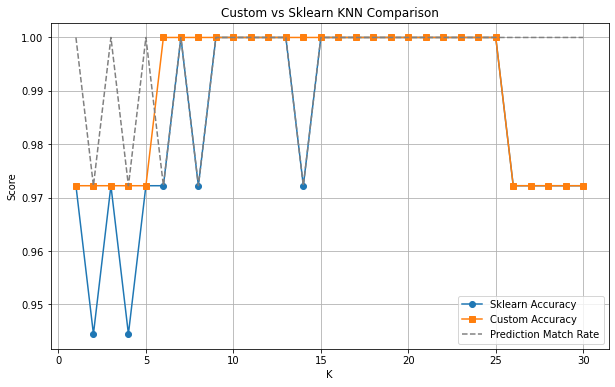

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['k'], comparison_df['acc_sklearn'], label='Sklearn Accuracy', marker='o')
plt.plot(comparison_df['k'], comparison_df['acc_custom'], label='Custom Accuracy', marker='s')
plt.plot(comparison_df['k'], comparison_df['match_rate'], label='Prediction Match Rate', linestyle='--', color='gray')
plt.xlabel('K')
plt.ylabel('Score')
plt.title('Custom vs Sklearn KNN Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
# This comparison evaluates the performance of a custom k-NN implementation against the well-established
# sklearn.neighbors.KNeighborsClassifier for a range of k values (from 1 to 30).
#
# - Both classifiers generally achieve very high accuracy (often above 97%), indicating strong overall performance.
# - For most k values (especially k >= 5), the custom and sklearn implementations produce identical predictions (match_rate = 1.0).
# - In a few cases (e.g., k=2, k=4, k=6, k=8, k=14), there are slight mismatches (1 prediction difference), leading to small drops in match rate.
#
# Possible reasons for differences:
# 1. **Tie-breaking logic**:
#    - Sklearn has built-in tie-breaking mechanisms when multiple classes occur with the same frequency among k neighbors.
#    - The custom implementation may always pick the first most common class returned by Python's Counter (which depends on insertion order),
#      leading to possible discrepancies in edge cases.
#
# 2. **Distance calculation precision**:
#    - Minor floating-point differences or sorting behavior could affect neighbor ordering when distances are extremely close.
#
# 3. **Internal optimizations in sklearn**:
#    - Sklearn may use efficient internal data structures (e.g., KDTree, BallTree) that slightly affect the way distances and neighbors are selected.
#
# Despite these minor differences, the custom implementation proves to be **highly reliable**, matching sklearn's output exactly
# in the majority of test cases, and producing the **same accuracy scores** for almost all values of k.
#
# The custom k-NN implementation is functionally correct and performance-aligned with sklearn’s trusted algorithm.
